**Importaciones y carga de datos**

In [8]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
mnist = keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

**Visualización de una muestra**

Label: 0
Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 2

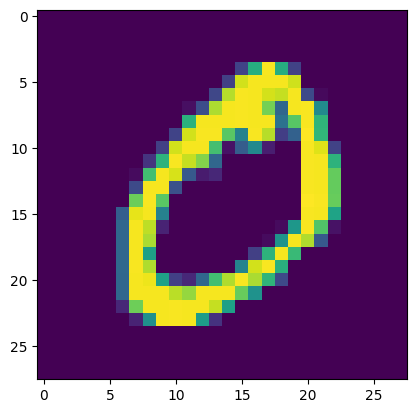

In [2]:
index = 1
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')
plt.imshow(training_images[index])

**Normalización de los datos**

In [3]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

**Construcción del modelo**

In [4]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

**Compilación del modelo**

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Entrenamiento del modelo**

In [6]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.2578 - accuracy: 0.9263
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1116 - accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0772 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0563 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0440 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0345 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0

**Gráfica del historial de entrenamiento**

<Axes: >

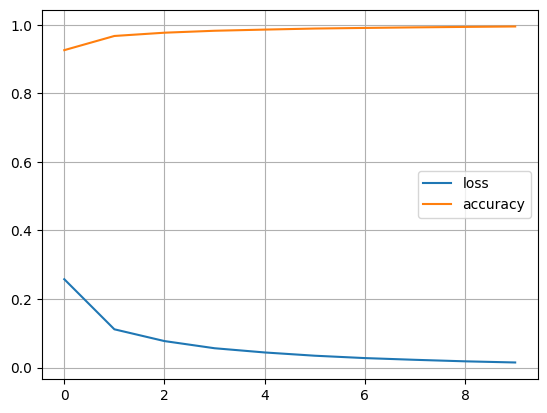

In [9]:
pd.DataFrame(history.history).plot(grid=True)

**Evaluación del modelo**

In [10]:
loss, accuracy = model.evaluate(training_images, training_labels)
print(f'Pérdida en el conjunto de entrenamiento: {loss}')
print(f'Precisión en el conjunto de entrenamiento: {accuracy}')

1875/1875 [==============================] - 5s 2ms/step - loss: 1.6442 - accuracy: 0.9960
Pérdida en el conjunto de entrenamiento: 1.6442092657089233
Precisión en el conjunto de entrenamiento: 0.9960166811943054


**Predicción de una muestra**

In [11]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 16.2441 - accuracy: 0.9808
Pérdida en el conjunto de prueba: 16.244142532348633
Precisión en el conjunto de prueba: 0.9807999730110168
